<a href="https://www.kaggle.com/code/mayukhbaruah/dewali-sales-eda67fea4ad59?scriptVersionId=173643709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/diwali-sales/Diwali Sales Data.csv', encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#Drope blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#Drope null values
df.dropna(inplace=True)

In [9]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
## to change the dtype of column Amount
df['Amount'] = df['Amount'].astype(int)

In [11]:
df['Amount'].dtype

dtype('int64')

## EDA 

In [12]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

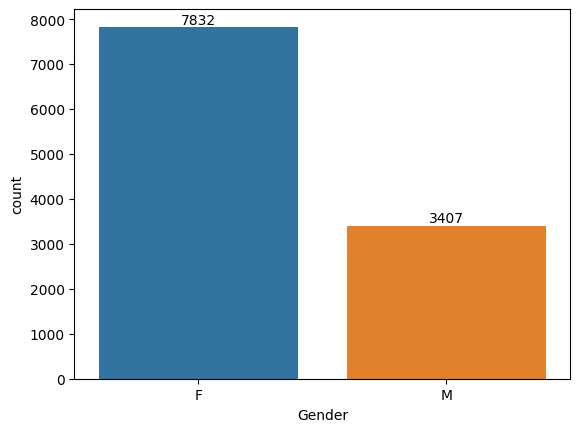

In [13]:
# Ploting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

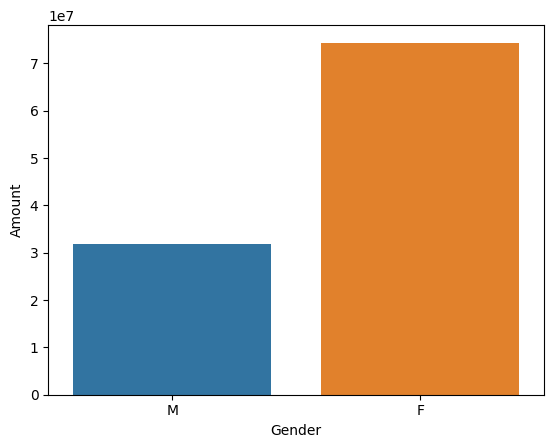

In [14]:
#Ploting a bar chart for Gender vs Amount
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sns.barplot(x='Gender',y="Amount",data=sales_gen)


*From the above graph we can see thea most of thr buyers are Feamles and also the  purchasing amount is also greater the Men*

**Age**

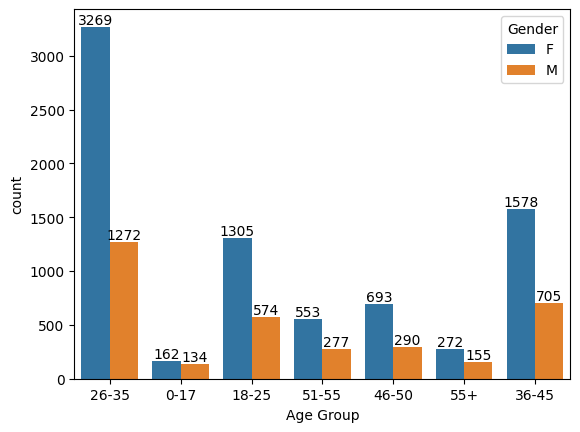

In [15]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

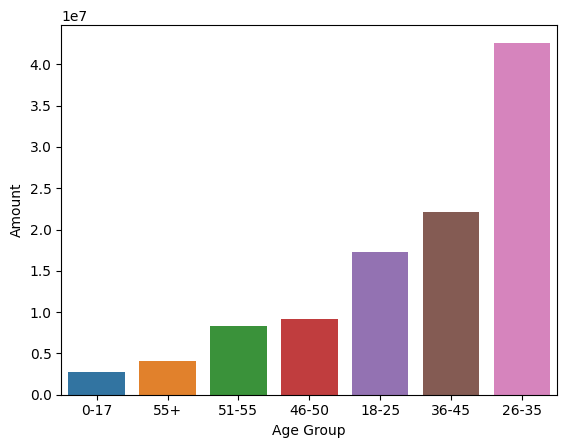

In [16]:
#Bar graph for Age Group vs Amount
sales_Age=df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount')
sns.barplot(x='Age Group',y='Amount',data=sales_Age)
plt.show()


*From above graph we can see that most of the buyers are of age group between 26-35 yrs Female*

**State**

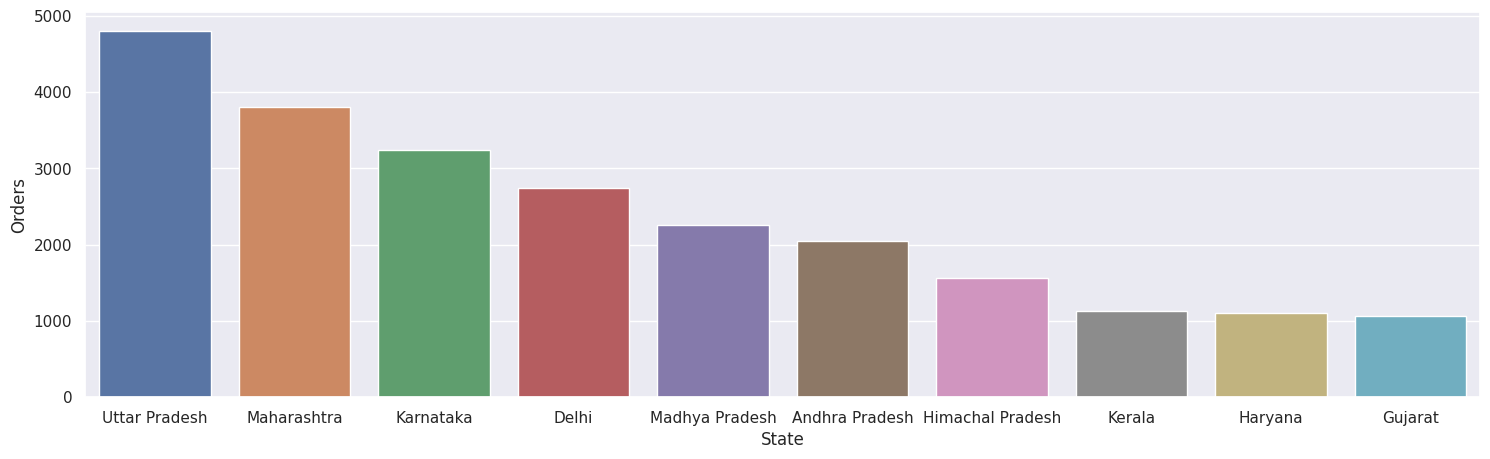

In [17]:
#Total number of orders from to 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(x='State',y='Orders',data=sales_state)
plt.show()

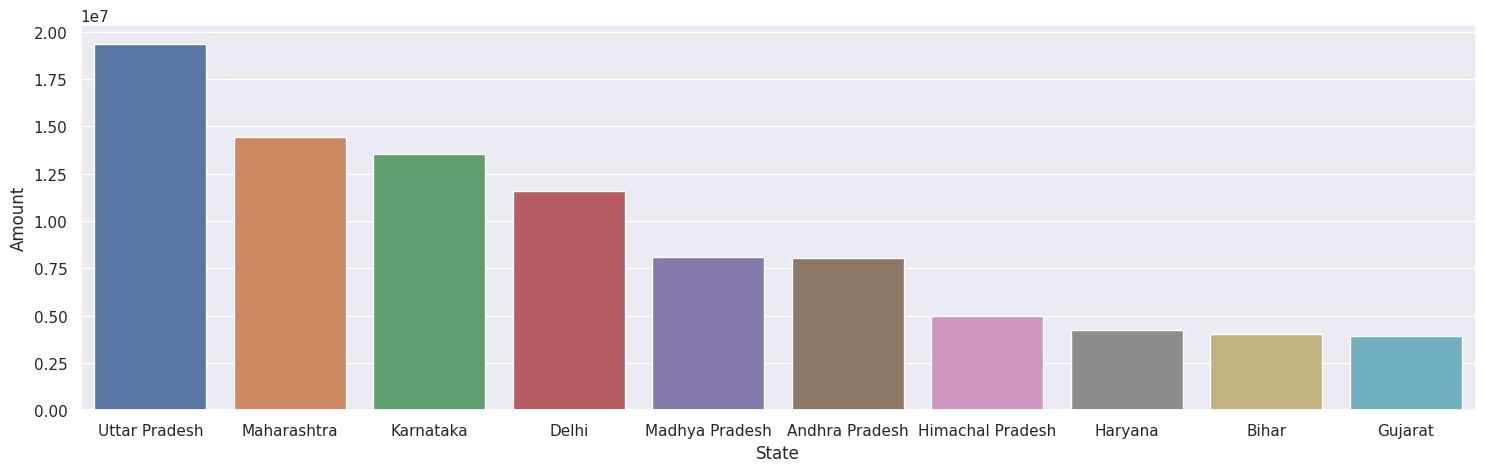

In [18]:
#Total Amount from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(x='State',y='Amount',data=sales_state)
plt.show()

*From the graph we can see that most of the orders and total sales amount from Uttar Pradesh,Maharashtra and Karnataka*

**Marital_Status**

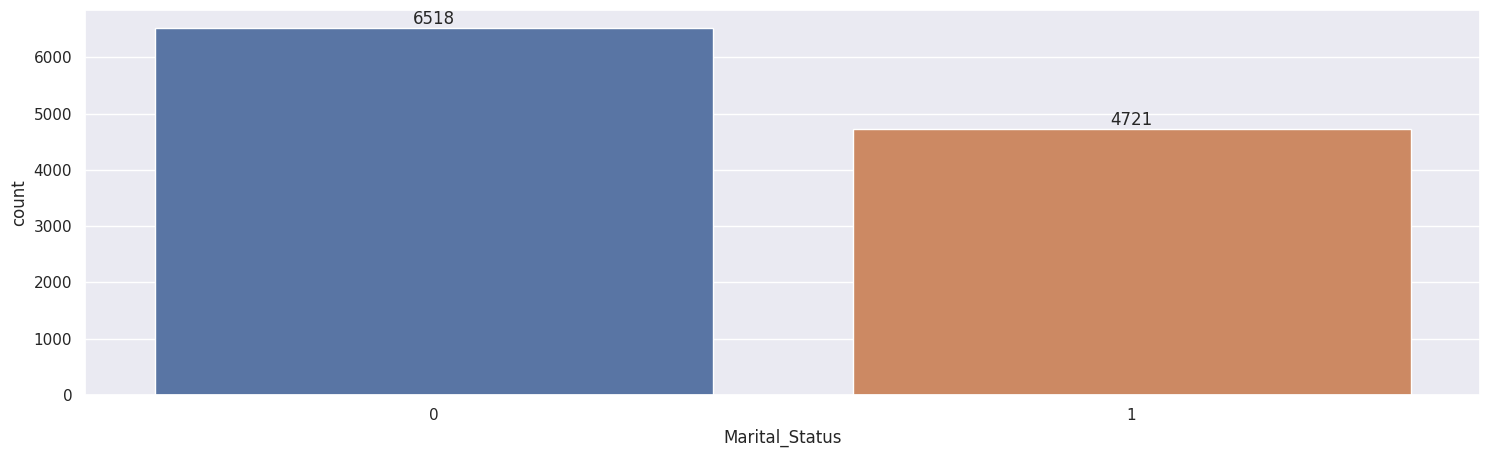

In [19]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

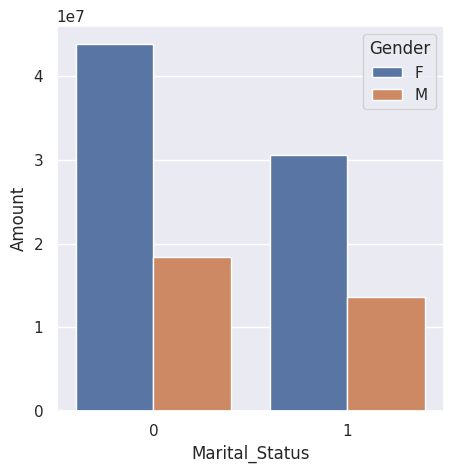

In [20]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')
plt.show()

*From the graph we can see that most of the buyers are married (women) and they have high purchasing power*

**Occupation**

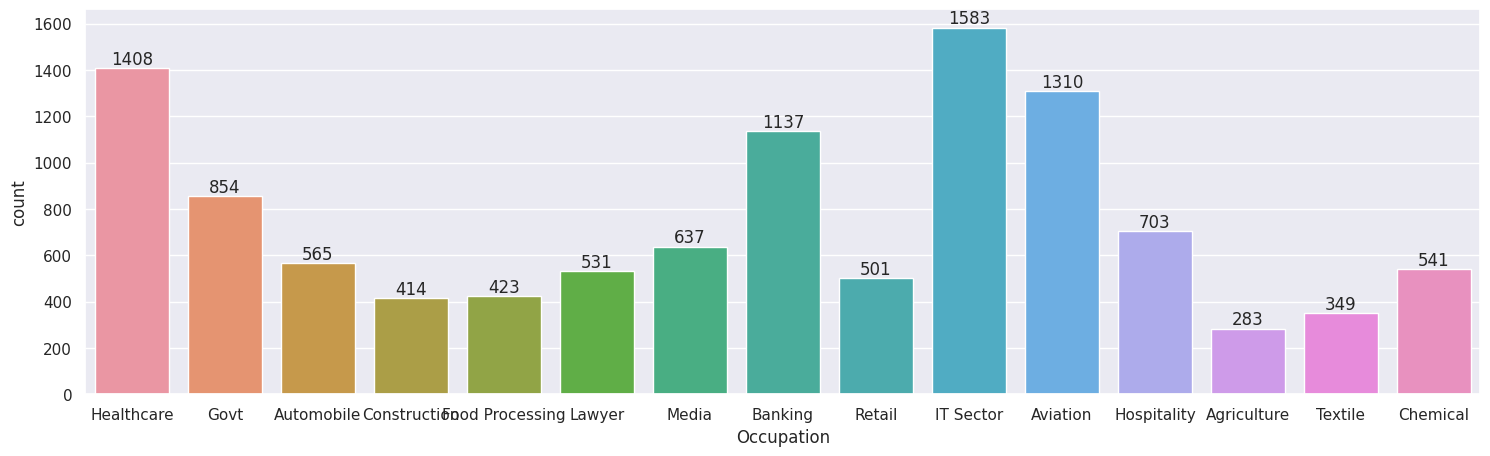

In [21]:
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

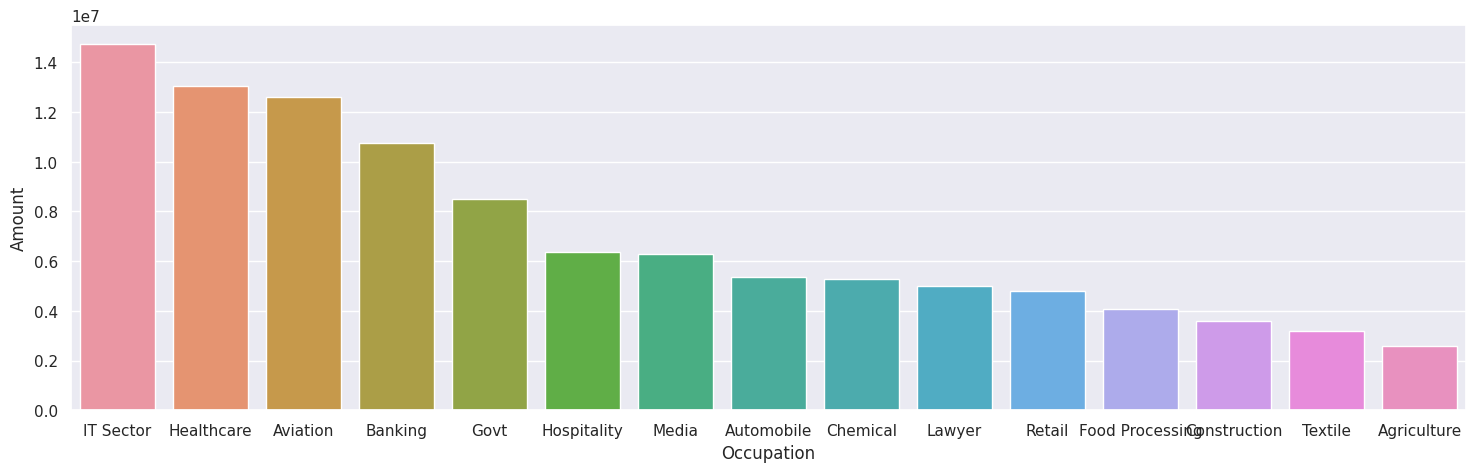

In [22]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=sales_state)

plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

**Product_Category**

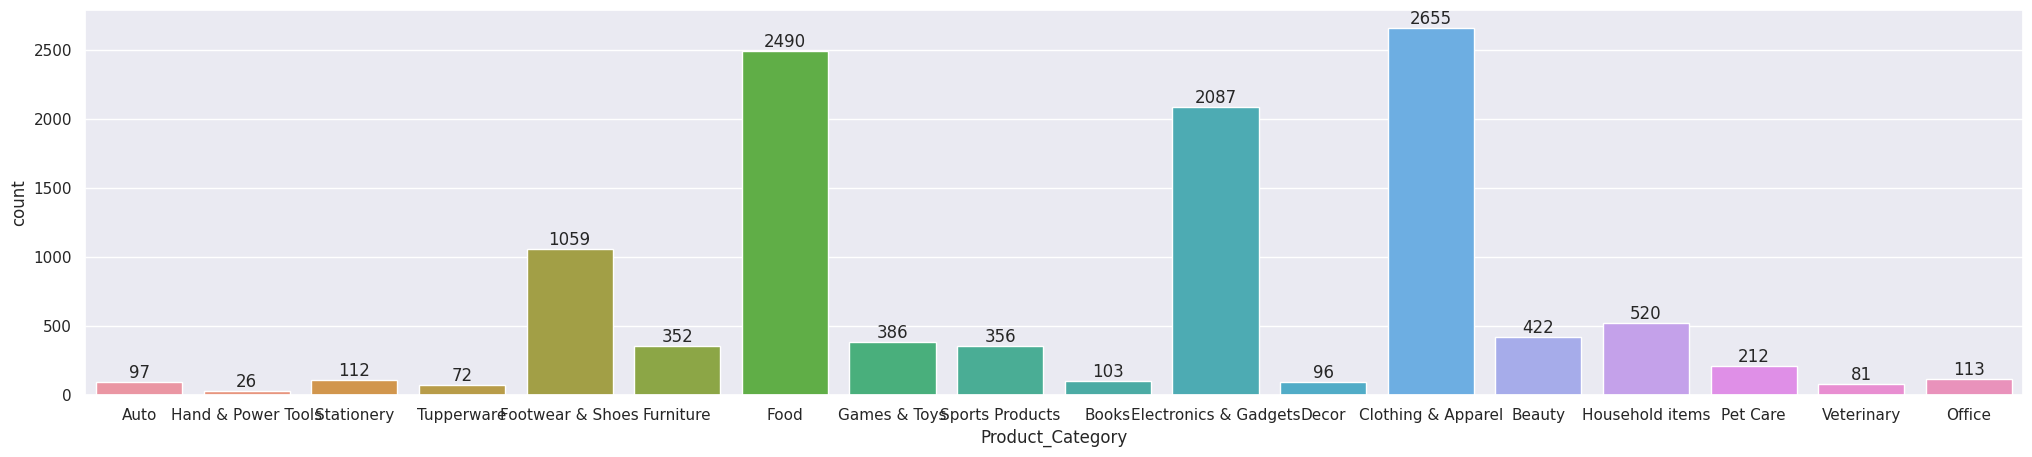

In [23]:
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most sold products are from Food, Clothing and Electronics category*

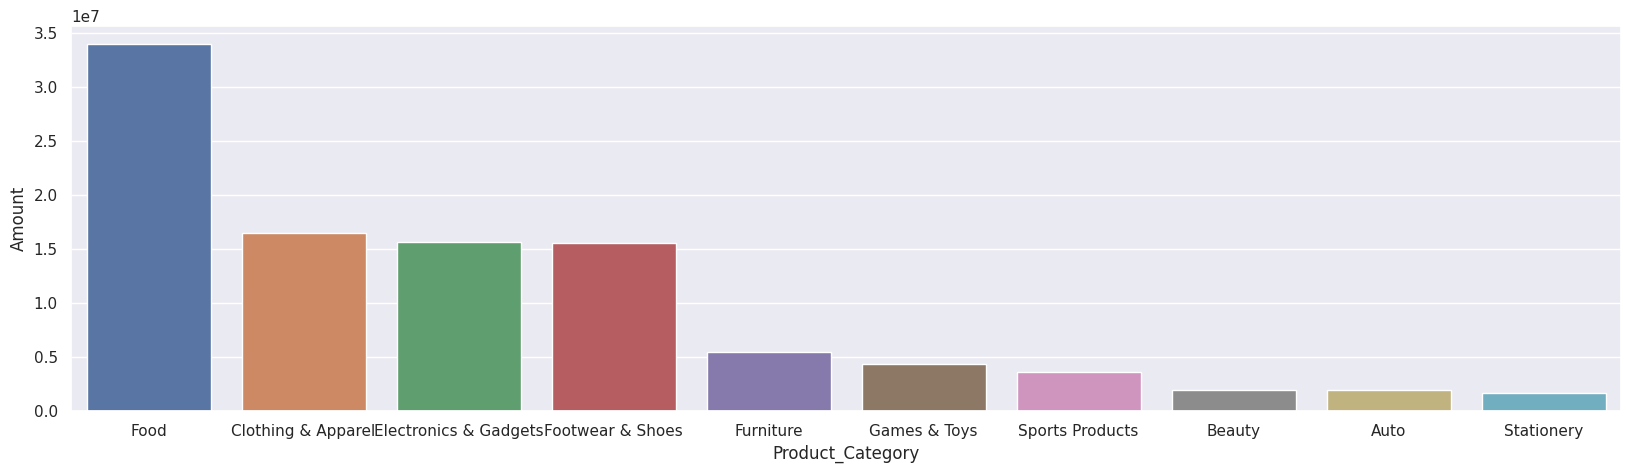

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=sales_state)
plt.show()

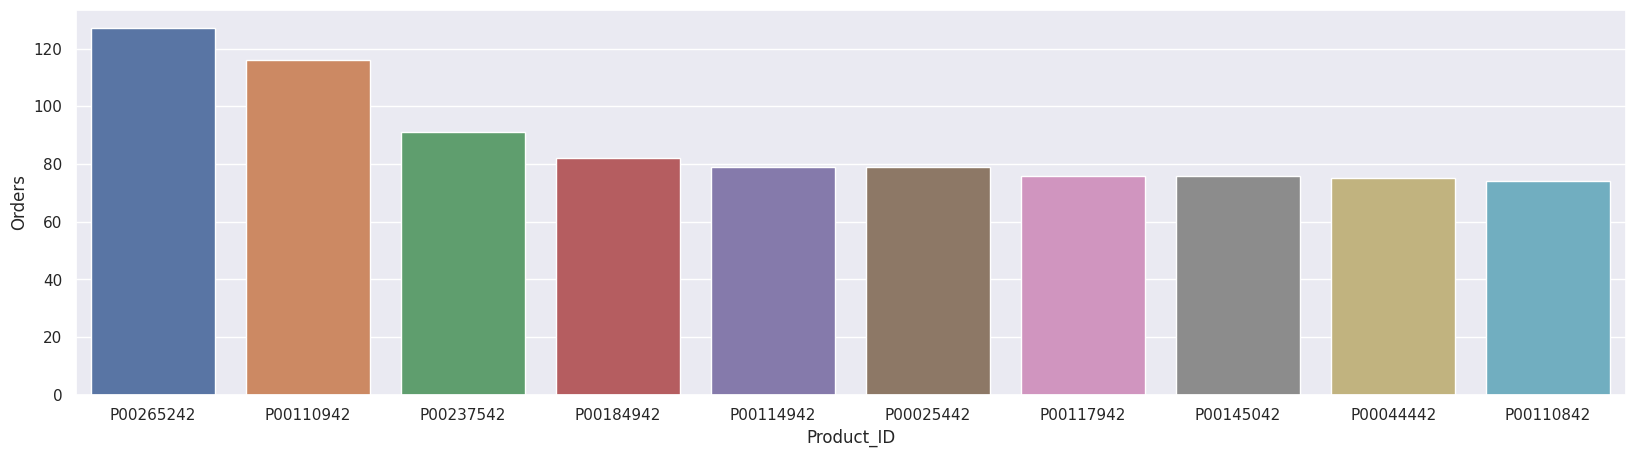

     Product_ID  Orders
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
679   P00114942      79
171   P00025442      79
708   P00117942      76
888   P00145042      76
298   P00044442      75
643   P00110842      74


In [25]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data=sales_state)
plt.show()
print(sales_state)

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

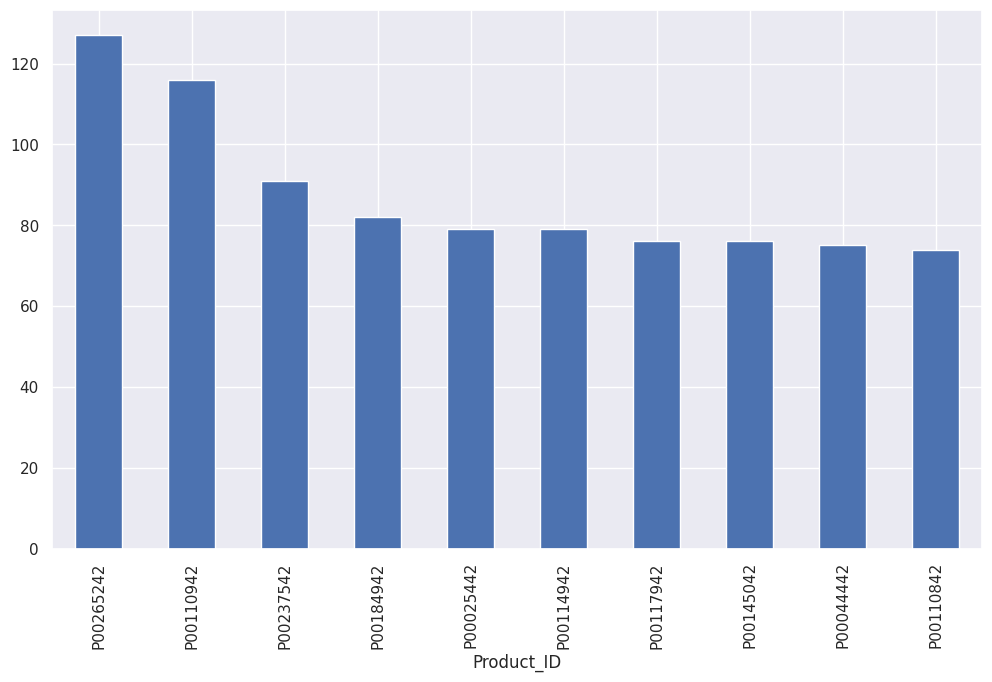

In [27]:
#Top 10 most sold products
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

## Conclusion

**Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category in Dewali Sales**

**github repository** : (https://github.com/MayukhBaruaha/Exploratory-Data-Analysis-)